## Challenge 3
<div class="alert alert-warning">
Predicting rider retention.
<br/>
    
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
<br/>
    
2. Build a predictive model to help determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
<br/>
    
3. Briefly discuss the company might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).
</div>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

import datetime

In [26]:
data_df = pd.read_json("./data/attributes.json")

In [27]:
data_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,upgraded_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [28]:
data_df["last_trip_date"] = pd.to_datetime(data_df["last_trip_date"])

In [29]:
# Since, we do not know the date the data was pulled we will assume it is right after the most recent trip date
retrieved_date = max(data_df['last_trip_date'])

In [30]:
data_df['active?'] = ((retrieved_date - data_df['last_trip_date']) <= datetime.timedelta(days=30)).astype(int)

In [31]:
data_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,upgraded_user,weekday_pct,avg_dist,avg_rating_by_driver,active?
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


<div class="alert alert-info">
Let's look at which city most of the active and inactive users are from. 
</div>

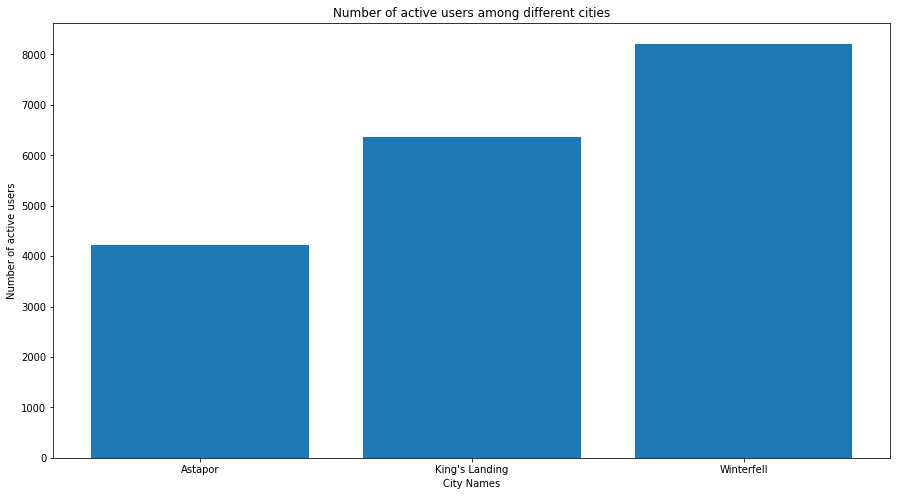

In [41]:
a = data_df[data_df['active?'] == 1]
a = a.groupby('city').count()
fig, ax = plt.subplots(figsize = (15,8))

plt.bar(a.index, a['active?'])
plt.xlabel("City Names")
plt.ylabel("Number of active users")
plt.title("Number of active users among different cities")

plt.show()

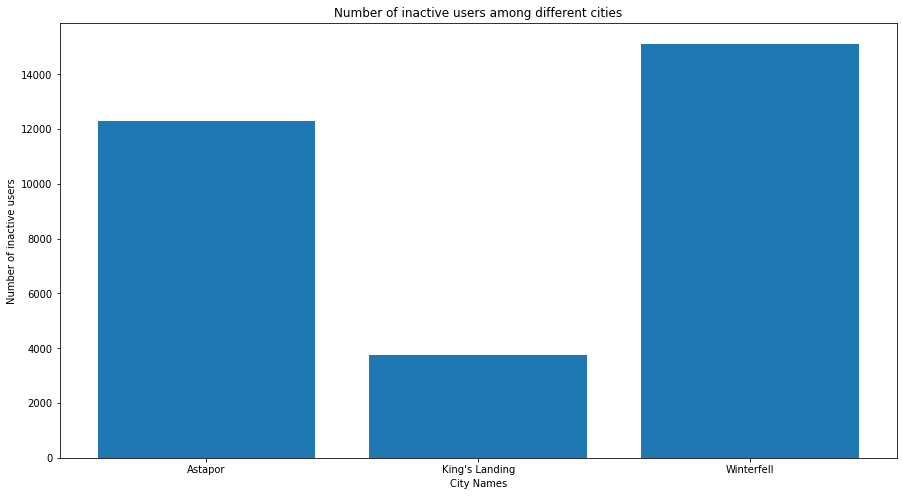

In [42]:
a = data_df[data_df['active?'] == 0]
a = a.groupby('city').count()
fig, ax = plt.subplots(figsize = (15,8))

plt.bar(a.index, a['active?'])
plt.xlabel("City Names")
plt.ylabel("Number of inactive users")
plt.title("Number of inactive users among different cities")

plt.show()

<div class="alert alert-success">
Looking at the two bar graphs Winterfell has the largest number of both active and inactive users. But for King's Landing the number of active users far weight the number of inactive users, something that is not observable for both the cities of Astapor and Winterfell.
</div>

<div class="alert alert-info">
Let's look at how many trips on average active and inactive users tooks in their first 30 days. 
</div>

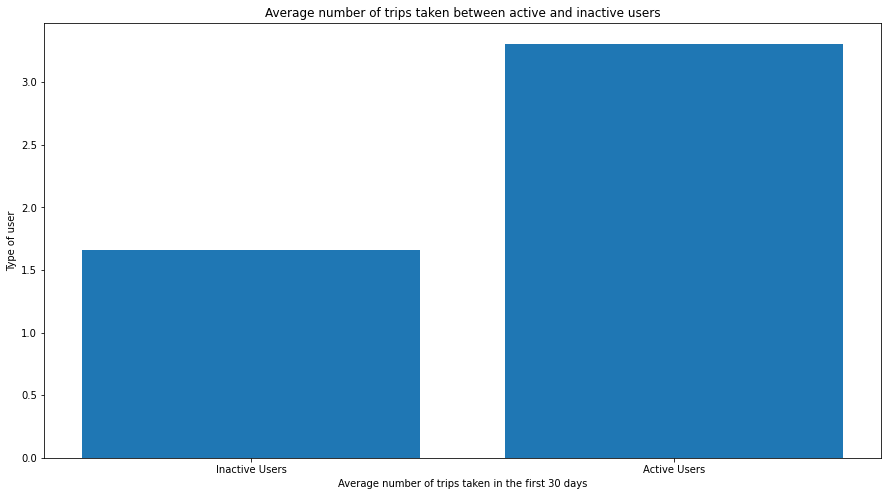

In [50]:
a = data_df.groupby('active?').mean()
fig, ax = plt.subplots(figsize = (15,8))

plt.bar(a.index, a['trips_in_first_30_days'])
plt.xticks([0, 1], ["Inactive Users", "Active Users"])
plt.xlabel("Average number of trips taken in the first 30 days")
plt.ylabel("Type of user")
plt.title("Average number of trips taken between active and inactive users")

plt.show()

<div class="alert alert-success">
Looking at the two bar graphs it seems like the more trips a user takes on their first 30 days, the more prone they are to being an active user compared to an inactive user.
</div>